In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [ ]:
def save_png():
    pass



In [3]:
# Dane
data = {
    "miejsce": ["półka", "półka", "szafka", "szafka", "lodówka", "lodówka", "zamrażarka", "zamrażarka"],
    "data": ["21.03.2025", "12.05.2025", "21.03.2025", "30.05.2025", "21.03.2025", "10.06.2025", "21.03.2025", "16.06.2025"],
    "stężenie": [400, 108.92, 400, 353.25, 400, 80.13, 400, 29.41]
}
df = pd.DataFrame(data)
df['data'] = pd.to_datetime(df['data'], format='%d.%m.%Y')


TypeError: can't compare offset-naive and offset-aware datetimes

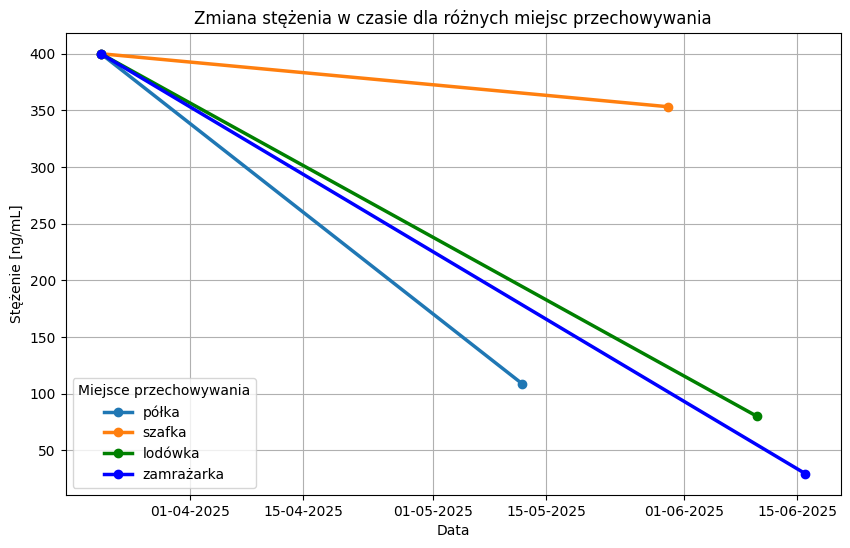

In [ ]:
# Wykres
custom_colors = {
    "lodówka": "green",
    "zamrażarka": "blue"
}


plt.figure(figsize=(10, 6))
for miejsce in df['miejsce'].unique():
    df_filtered = df[df['miejsce'] == miejsce].sort_values(by='data')
    color = custom_colors.get(miejsce, None)
    plt.plot(df_filtered['data'], df_filtered['stężenie'], marker='o', label=miejsce, linewidth=2.5, color=color)

plt.xlabel('Data')
plt.ylabel('Stężenie [ng/mL]')
plt.title('Zmiana stężenia w czasie dla różnych miejsc przechowywania')
plt.legend(title='Miejsce przechowywania')
plt.grid(True)

# Format dat i zaznaczenie konkretnej daty
ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
start_date = pd.to_datetime('21.03.2025', format='%d.%m.%Y')
xticks = list(set(mdates.num2date(ax.get_xticks()).tolist() + [start_date]))
ax.set_xticks(sorted(xticks))

plt.tight_layout()
plt.show()